<a href="https://colab.research.google.com/github/mervefilizbaker1/DRIVER-RISK-PREDICTION/blob/main/drp_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DRIVER RISK PREDICTION - UNSUPERVISED LEARNING


In [48]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [3]:
df_accident = pd.read_csv('/content/drive/MyDrive/DRP/df_accident')

In [4]:
X = df_accident.drop(['risk_class','Accident_severity','driver_risk_score','env_risk_score','behaviour_risk_score','total_risk_score'], axis=1)
y = df_accident['risk_class']

In [5]:
df_accident.head()

,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,...,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,driver_risk_score,env_risk_score,behaviour_risk_score,total_risk_score,risk_class
0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.475,0.200,0.5,0.391667,Low
1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.350,0.200,1.0,0.516667,Medium
2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.475,0.200,0.2,0.291667,Low
3,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.425,0.650,0.2,0.425000,Medium
4,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.425,0.425,1.0,0.616667,Medium


In [6]:
df_accident['risk_class'].value_counts()

,count
risk_class,
Medium,6307
Low,5802
High,207


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
print("Scaled X shape:", X_scaled.shape)
print("Mean :", X_scaled.mean())
print("Std :", X_scaled.std())

Scaled X shape: (12316, 99)
Mean : 5.7255589172358405e-18
Std : 1.0


# K-MEANS

In [13]:
k_means = KMeans(n_clusters=3, random_state=42, n_init=10)


In [14]:
clusters = k_means.fit_predict(X_scaled)

In [15]:
print("Cluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())
print("\nReal risk_class distribution:")
print(y.value_counts())

Cluster distribution:
0    9953
1    2171
2     192
Name: count, dtype: int64

Real risk_class distribution:
risk_class
Medium    6307
Low       5802
High       207
Name: count, dtype: int64


In [17]:
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.09075826745494067


In [18]:
ari_score = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index:", ari_score)

Adjusted Rand Index: 0.02703922307292376


In [19]:
crosstab = pd.crosstab(clusters, y, margins=True)
print(crosstab)

risk_class  High   Low  Medium    All
row_0                                
0             60  5080    4813   9953
1            137   663    1371   2171
2             10    59     123    192
All          207  5802    6307  12316


# PCA

In [21]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [22]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:", pca.explained_variance_ratio_.cumsum())

Explained Variance Ratio: [0.02602406 0.01964603]
Cumulative Explained Variance Ratio: [0.02602406 0.04567009]


In [23]:
print(f"X_pca shape: {X_pca.shape}")

X_pca shape: (12316, 2)


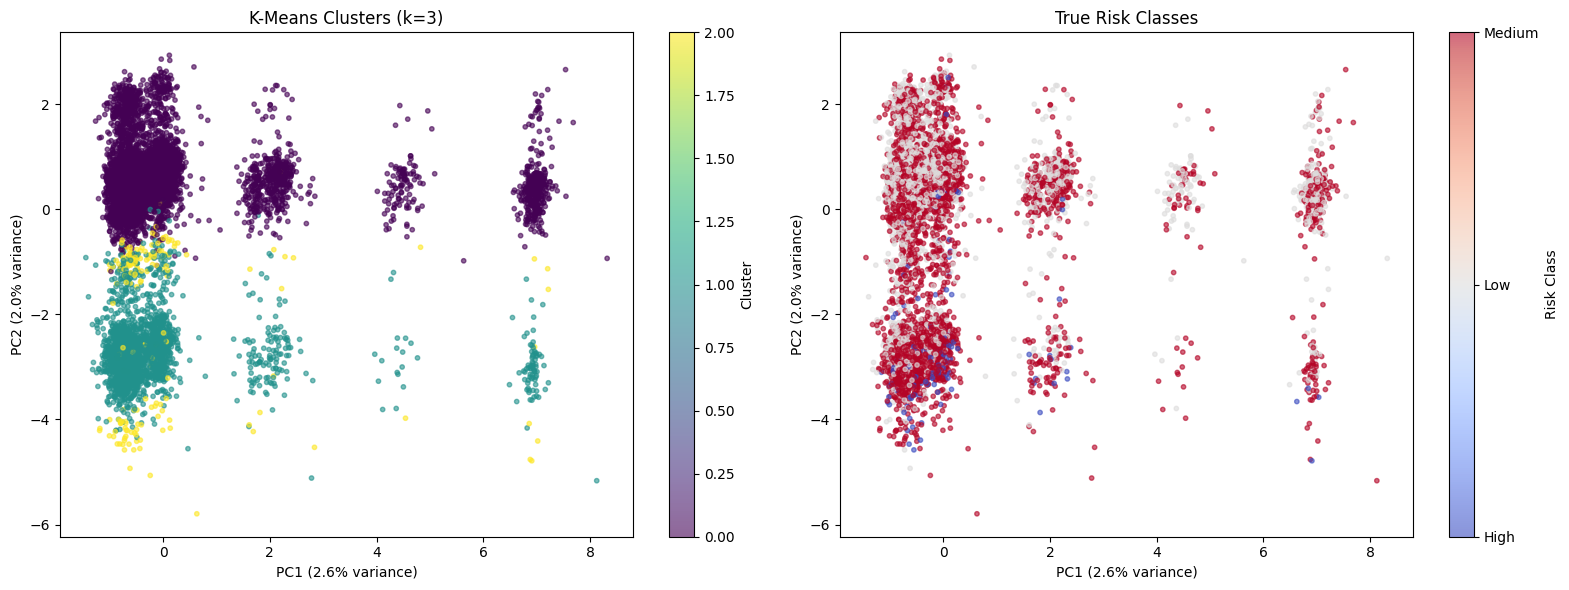

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters,
                           cmap='viridis', alpha=0.6, s=10)
axes[0].set_xlabel('PC1 (2.6% variance)')
axes[0].set_ylabel('PC2 (2.0% variance)')
axes[0].set_title('K-Means Clusters (k=3)')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded,
                          cmap='coolwarm', alpha=0.6, s=10)
axes[1].set_xlabel('PC1 (2.6% variance)')
axes[1].set_ylabel('PC2 (2.0% variance)')
axes[1].set_title('True Risk Classes')
plt.colorbar(scatter2, ax=axes[1], label='Risk Class',
             ticks=[0,1,2], format=plt.FuncFormatter(lambda x, p: le.classes_[int(x)]))

plt.tight_layout()
plt.show()

In [26]:
# 2D PCA is insufficient for binary (one-hot encoded) features. But there are patterns!

In [27]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

In [28]:
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_temp.labels_))

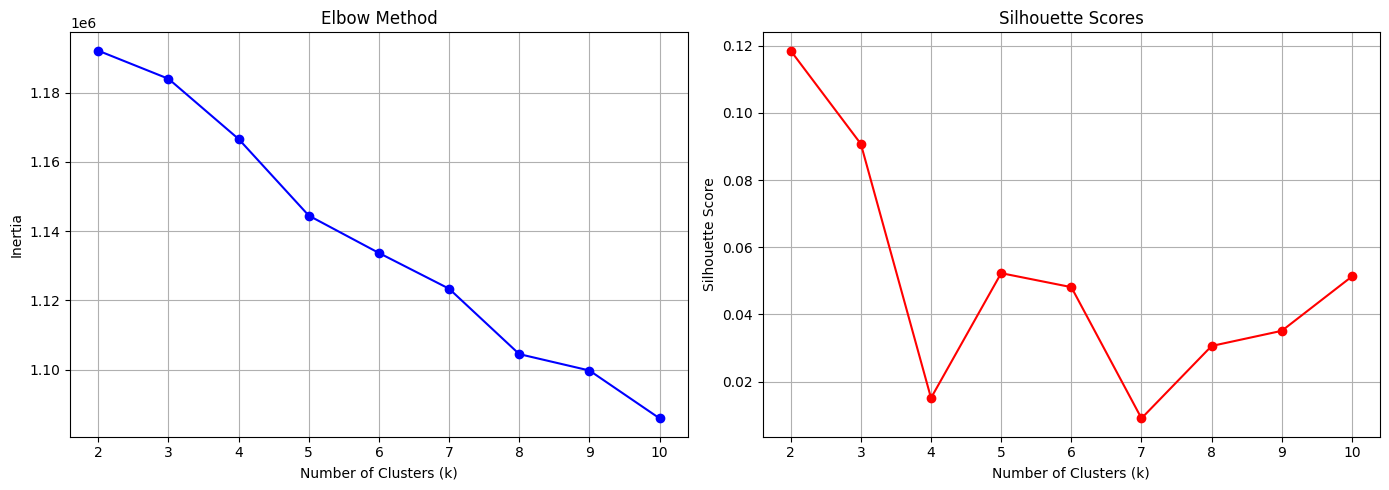

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Scores')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [30]:

print("Silhouette scores by k:")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

Silhouette scores by k:
k=2: 0.1185
k=3: 0.0908
k=4: 0.0151
k=5: 0.0523
k=6: 0.0481
k=7: 0.0090
k=8: 0.0306
k=9: 0.0351
k=10: 0.0513


In [31]:
pca_full = PCA(n_components=0.7, random_state=42)
X_pca_full = pca_full.fit_transform(X_scaled)

In [32]:
print(f"PCA components: {pca_full.n_components_}")
print(f"Explained variance: {pca_full.explained_variance_ratio_.sum():.4f}")

PCA components: 57
Explained variance: 0.7068


In [33]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca_full)

In [34]:
sil_pca = silhouette_score(X_pca_full, clusters_pca)
ari_pca = adjusted_rand_score(y, clusters_pca)

In [36]:
print(f"\nAfter PCA K-Means:")
print(f"Silhouette Score: {sil_pca:.4f}")
print(f"Adjusted Rand Index: {ari_pca:.4f}")


After PCA K-Means:
Silhouette Score: 0.0463
Adjusted Rand Index: 0.0170


In [37]:
print("\nCluster distribution:")
print(pd.Series(clusters_pca).value_counts().sort_index())


Cluster distribution:
0    2182
1    2906
2    7228
Name: count, dtype: int64


# Hierarchical Clustering

In [39]:
np.random.seed(42)
sample_indices = np.random.choice(X_scaled.shape[0], size=1000, replace=False)
X_sample = X_scaled[sample_indices]
y_sample = y.iloc[sample_indices]

In [40]:
linkage_matrix = linkage(X_sample, method='ward')

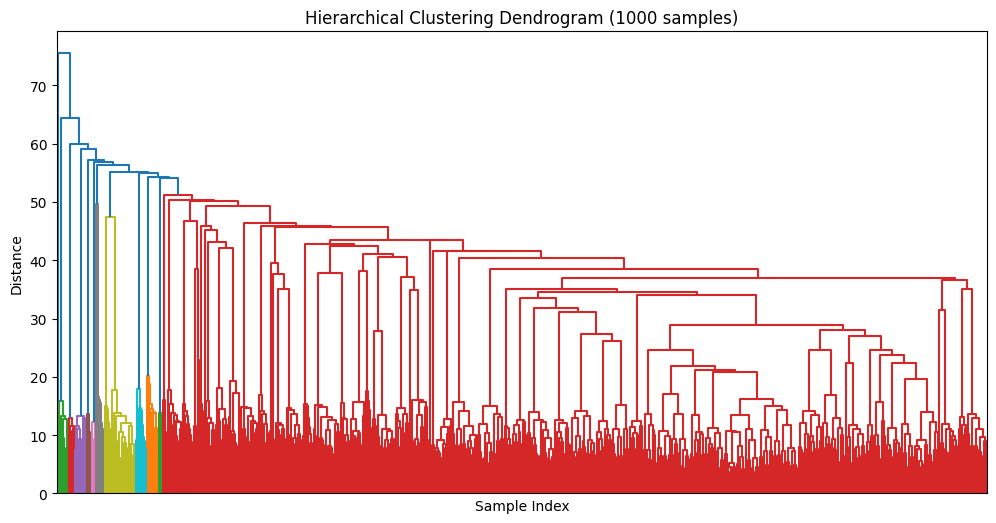

In [41]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram (1000 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Agglomerative Clustering

In [43]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agg = agg_clustering.fit_predict(X_scaled)

In [44]:
sil_agg = silhouette_score(X_scaled, clusters_agg)
ari_agg = adjusted_rand_score(y, clusters_agg)

In [45]:
print(f"Agglomerative Clustering:")
print(f"Silhouette Score: {sil_agg}")
print(f"Adjusted Rand Index: {ari_agg}")

Agglomerative Clustering:
Silhouette Score: 0.08806333025497425
Adjusted Rand Index: 0.00042888969575654125


In [46]:
print("\nCluster distribution:")
print(pd.Series(clusters_agg).value_counts().sort_index())


Cluster distribution:
0    11277
1      392
2      647
Name: count, dtype: int64


In [47]:
print("\nCluster vs Risk_class:")
crosstab_agg = pd.crosstab(clusters_agg, y, margins=True)
print(crosstab_agg)


Cluster vs Risk_class:
risk_class  High   Low  Medium    All
row_0                                
0            190  5289    5798  11277
1              3   211     178    392
2             14   302     331    647
All          207  5802    6307  12316


# DBSCAN

In [49]:
dbscan = DBSCAN(eps=5, min_samples=50)
clusters_dbscan = dbscan.fit_predict(X_scaled)

In [50]:
print(f"DBSCAN Cluster distribution:")
print(pd.Series(clusters_dbscan).value_counts().sort_index())
print(f"\nOutliers (cluster=-1): {(clusters_dbscan == -1).sum()}")

DBSCAN Cluster distribution:
-1    8683
 0    3384
 1      84
 2      69
 3      96
Name: count, dtype: int64

Outliers (cluster=-1): 8683


In [51]:
outliers_mask = clusters_dbscan == -1
print(f"\nOutliers' risk classes:")
print(y[outliers_mask].value_counts())


Outliers' risk classes:
risk_class
Medium    4622
Low       3879
High       182
Name: count, dtype: int64


UNSUPERVISED LEARNING RESULTS:

All the methods I tried (K-Means, Hierarchical, DBSCAN) showed low performance because:

Binary one-hot features are not suitable for distance-based metrics

The data is sparse and high-dimensional (99 features)

The risk classes are inherently overlapping (as seen in the PCA results)

Unsupervised learning identified other patterns — but they do not align with the risk classes

What I Learned:

K-Means: k=2–3 seems optimal, but the Silhouette score is only ~0.09–0.12

PCA: The first 2 components explain only 4.5% of the variance

Clustering does not separate the risk classes

Unsupervised learning naturally discovers patterns different from supervised labels